<a href="https://colab.research.google.com/github/Sam-Modi/AD-lab/blob/main/AD_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Classification- Logistic Regression , Decision tree , Random forest


Sambhav Modi
2205588


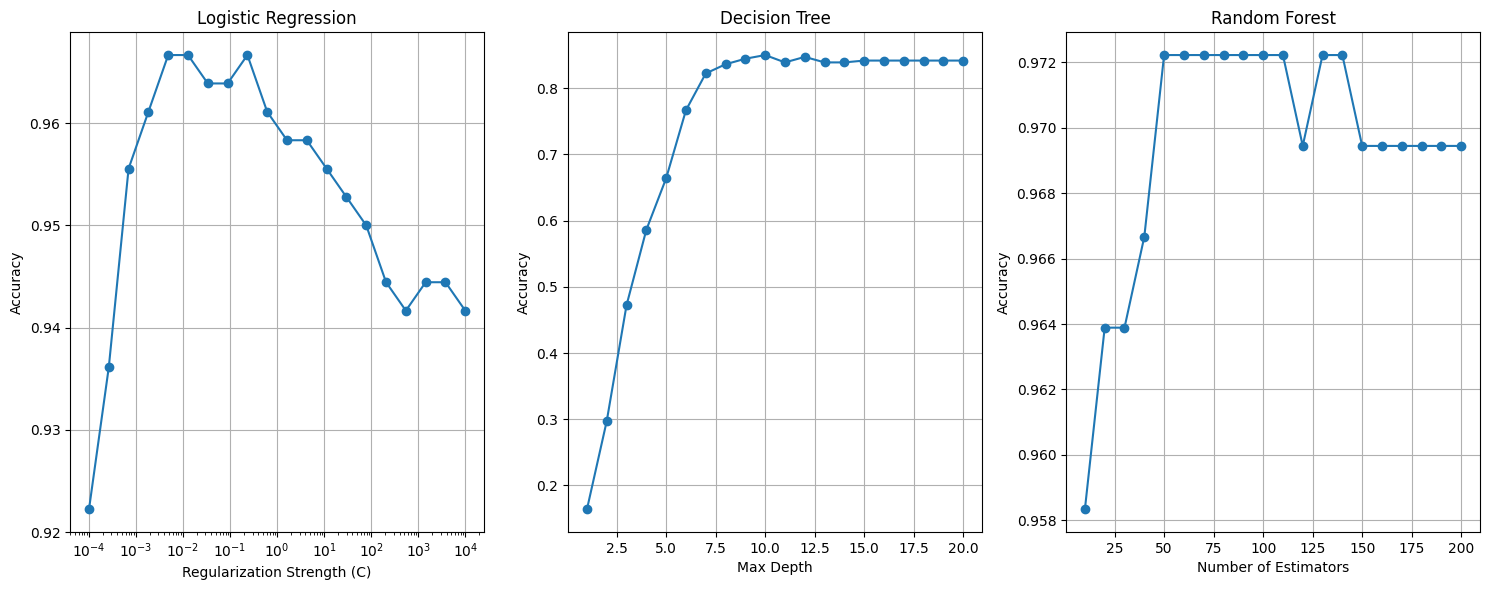

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.966667   0.967263  0.966667  0.966802
1        Decision Tree  0.850000   0.851270  0.850000  0.849623
2        Random Forest  0.972222   0.972786  0.972222  0.972253


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Sambhav Modi\n2205588")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Set a large width to avoid truncation

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
C_values = np.logspace(-4, 4, 20)
accuracy_values_lr = []

for C in C_values:
    model_lr = LogisticRegression(C=C, solver='liblinear', max_iter=10000)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    accuracy_values_lr.append(accuracy_score(y_test, y_pred_lr))

# Decision Tree
max_depth_values = range(1, 21)
accuracy_values_dt = []

for max_depth in max_depth_values:
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    accuracy_values_dt.append(accuracy_score(y_test, y_pred_dt))

# Random Forest
n_estimators_values = range(10, 210, 10)
accuracy_values_rf = []

for n_estimators in n_estimators_values:
    model_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    accuracy_values_rf.append(accuracy_score(y_test, y_pred_rf))

# Plot the accuracy values for all three classifiers
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(C_values, accuracy_values_lr, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(max_depth_values, accuracy_values_dt, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(n_estimators_values, accuracy_values_rf, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate the best hyperparameter values and evaluation metrics for each classifier
best_C = C_values[np.argmax(accuracy_values_lr)]
best_model_lr = LogisticRegression(C=best_C, solver='liblinear', max_iter=10000)
best_model_lr.fit(X_train, y_train)
y_pred_best_lr = best_model_lr.predict(X_test)

accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
precision_best_lr = precision_score(y_test, y_pred_best_lr, average='weighted')
recall_best_lr = recall_score(y_test, y_pred_best_lr, average='weighted')
f1_best_lr = f1_score(y_test, y_pred_best_lr, average='weighted')

best_max_depth = max_depth_values[np.argmax(accuracy_values_dt)]
best_model_dt = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
best_model_dt.fit(X_train, y_train)
y_pred_best_dt = best_model_dt.predict(X_test)

accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt, average='weighted')
recall_best_dt = recall_score(y_test, y_pred_best_dt, average='weighted')
f1_best_dt = f1_score(y_test, y_pred_best_dt, average='weighted')

best_n_estimators = n_estimators_values[np.argmax(accuracy_values_rf)]
best_model_rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
best_model_rf.fit(X_train, y_train)
y_pred_best_rf = best_model_rf.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='weighted')
recall_best_rf = recall_score(y_test, y_pred_best_rf, average='weighted')
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')


results_table = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_best_lr, accuracy_best_dt, accuracy_best_rf],
    "Precision": [precision_best_lr, precision_best_dt, precision_best_rf],
    "Recall": [recall_best_lr, recall_best_dt, recall_best_rf],
    "F1 Score": [f1_best_lr, f1_best_dt, f1_best_rf]
})
print(results_table)